In [1]:
import copy
#packages we'll need

%matplotlib inline 
#this is a ``magic command'' specific to display plots in-line in a jupyter notebook
#normally you would plot by calling a plt.show()


from matplotlib.colors import LogNorm
#need this for the colourbar of the 2D histogram


%run DataAnalysis.ipynb
%run MonteCarlo.ipynb

In [2]:
data = DataAnalysis()
mc = MonteCarlo(10000, "isotropic")

data.set_eventdf(mc.get_data())

In [3]:
data.get_eventdf()

,Run,Channel,Time,NumPulses,OFdelay,MaxPosInWindow,SelectedEnergy,Baseline,MaxToBaseline,StabAmp
0,0,606,6.748663e+03,1,3.2,3.2,0.0,-2000.0,12000.0,0.0
1,0,607,6.748663e+03,1,3.2,3.2,0.0,-2000.0,12000.0,0.0
2,0,620,6.748663e+03,1,3.2,3.2,0.0,-2000.0,12000.0,0.0
3,0,621,6.748663e+03,1,3.2,3.2,0.0,-2000.0,12000.0,0.0
4,0,8,6.977965e+03,1,3.2,3.2,0.0,-2000.0,12000.0,0.0
...,...,...,...,...,...,...,...,...,...,...
6709,0,849,2.753117e+06,1,3.2,3.2,0.0,-2000.0,12000.0,0.0
6710,0,954,2.753117e+06,1,3.2,3.2,0.0,-2000.0,12000.0,0.0
6711,0,603,2.755307e+06,1,3.2,3.2,0.0,-2000.0,12000.0,0.0
6712,0,616,2.755307e+06,1,3.2,3.2,0.0,-2000.0,12000.0,0.0


In [4]:
noisydata = copy.deepcopy(data)

In [5]:
data.filter_noisy()

Text(0, 0.5, 'Number of Channels')

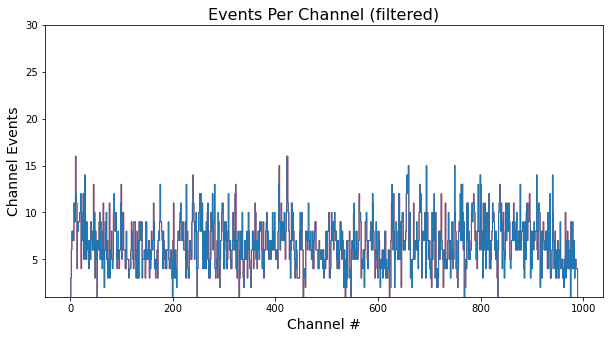

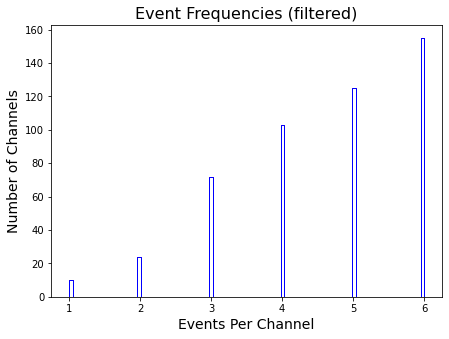

In [6]:
plt.figure(figsize=(10,5)) # lets you make a custom size for your plot
array1=plt.hist(noisydata.get_eventdf()['Channel'].values, np.linspace(0,989,990) , histtype='step', color='r')#np.linspace function is hlepful for generating bins
array2=plt.hist(data.get_eventdf()['Channel'].values, np.linspace(0,989,990), histtype='step')#np.linspace function is hlepful for generating bins
plt.title("Events Per Channel (filtered)", fontsize=16)
plt.xlabel('Channel #',fontsize=14)
plt.ylabel('Channel Events',fontsize=14)
#plt.gca().set_yscale("log")
plt.ylim(1,30)


#plt.savefig('plots/pdf/EventsPerChannel.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/EventsPerChannel.png',dpi=300,bbox_inches = "tight")


plt.figure(figsize=(7,5))
plt.hist(array1[0], np.linspace(1,6,100), histtype='step', color='r')
plt.hist(array2[0], np.linspace(1,6,100),color='b', histtype='step')
plt.title("Event Frequencies (filtered)",fontsize=16)
plt.xlabel('Events Per Channel',fontsize=14)
plt.ylabel('Number of Channels',fontsize=14)
#plt.gca().set_yscale("log")
#plt.gca().set_xscale("log")


#plt.savefig('plots/pdf/EventFrequency.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/EventFrequency.png',dpi=300,bbox_inches = "tight")

In [7]:
quietdata = copy.deepcopy(data)

In [8]:
data.filter_baseline()

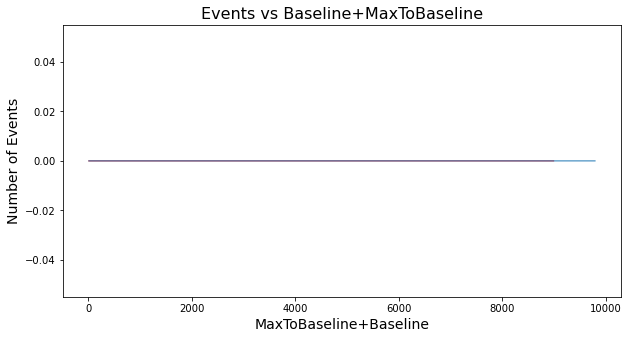

In [9]:
plt.figure(figsize=(10,5)) # lets you make a custom size for your plot
#plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Events vs Baseline+MaxToBaseline", fontsize=16)

plt.ylabel('Number of Events',fontsize=14)
plt.xlabel('MaxToBaseline+Baseline',fontsize=14)
plt.hist(quietdata.get_eventdf()['MaxToBaseline'].values+quietdata.get_eventdf()['Baseline'].values, np.linspace(0,9000,9001), histtype='step', color='r')
array=plt.hist(data.get_eventdf()['MaxToBaseline'].values+data.get_eventdf()['Baseline'].values, np.linspace(0,9800,9801), histtype='step')
#plt.gca().set_yscale("log")

#plt.savefig('plots/pdf/Baseline_MaxToBaseline.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Baseline_MaxToBaseline.png',dpi=300,bbox_inches = "tight")

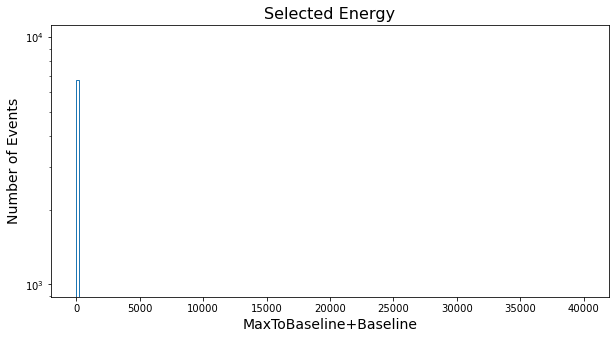

In [10]:
plt.figure(figsize=(10,5)) # lets you make a custom size for your plot
#plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Selected Energy", fontsize=16)

plt.ylabel('Number of Events',fontsize=14)
plt.xlabel('MaxToBaseline+Baseline',fontsize=14)
#plt.hist(quietdata.get_eventdf()['MaxToBaseline'].values+quietdata.get_eventdf()['Baseline'].values, np.linspace(0,9000,9001), histtype='step', color='r')
array=plt.hist(data.get_eventdf()['SelectedEnergy'].values, np.linspace(0,40000,200), histtype='step')
plt.gca().set_yscale("log")



In [11]:
event_threshold = 3
time_threshold = 1

data.arrange_clusters(event_threshold, time_threshold)
data.make_clusterdf()

In [12]:
messydata = copy.deepcopy(data)

In [13]:
messydata.get_clusterdf()

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh
0,0,4,4,6.751863e+03,0.0,0.884559,0.568032,-0.000000,0,0
1,1,11,11,6.981165e+03,0.0,0.957807,1.024396,0.602582,0,3
2,2,9,9,9.103364e+03,0.0,0.831165,0.636890,-1.356471,0,2
3,3,7,7,9.816036e+03,0.0,0.946811,1.240053,-0.029117,0,3
4,4,6,6,1.127052e+04,0.0,0.943084,0.881565,0.724022,0,0
...,...,...,...,...,...,...,...,...,...,...
858,858,5,5,2.749021e+06,0.0,1.003771,0.537724,-0.705407,0,0
859,859,5,5,2.750445e+06,0.0,1.037942,1.300678,-0.985795,0,2
860,860,10,10,2.752625e+06,0.0,0.276218,1.570796,0.000000,0,0
861,861,7,7,2.753120e+06,0.0,1.063492,1.298267,0.503446,1,1


In [14]:
print("Messy cluster rate: " + str(messydata.get_clusterrate()))
data.filter_clusterdf(2.5, 3) #(NRMSE, channels)
print("Filtered cluster rate: " + str(data.get_clusterrate()))

Messy cluster rate: 0.0003272729065436758
Filtered cluster rate: 0.0003272729065436758


In [15]:
data.get_clusterdf()

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh
0,0,4,4,6.751863e+03,0.0,0.884559,0.568032,-0.000000,0,0
1,1,11,11,6.981165e+03,0.0,0.957807,1.024396,0.602582,0,3
2,2,9,9,9.103364e+03,0.0,0.831165,0.636890,-1.356471,0,2
3,3,7,7,9.816036e+03,0.0,0.946811,1.240053,-0.029117,0,3
4,4,6,6,1.127052e+04,0.0,0.943084,0.881565,0.724022,0,0
...,...,...,...,...,...,...,...,...,...,...
858,858,5,5,2.749021e+06,0.0,1.003771,0.537724,-0.705407,0,0
859,859,5,5,2.750445e+06,0.0,1.037942,1.300678,-0.985795,0,2
860,860,10,10,2.752625e+06,0.0,0.276218,1.570796,0.000000,0,0
861,861,7,7,2.753120e+06,0.0,1.063492,1.298267,0.503446,1,1


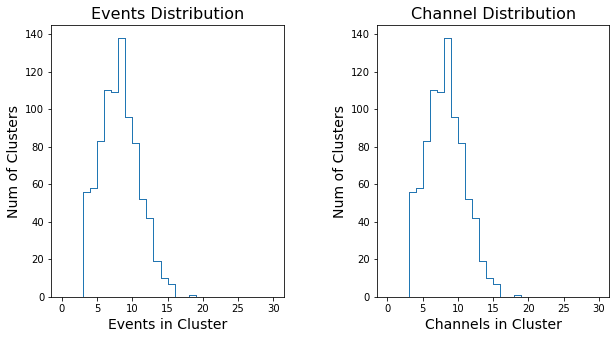

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
#fig.suptitle('Horizontally stacked subplots')
plt.subplots_adjust(wspace=.4)

ax1.set_title("Events Distribution", fontsize=16)
ax1.set_xlabel("Events in Cluster", fontsize=14)
ax1.set_ylabel("Num of Clusters", fontsize=14)
ax1.hist(messydata.get_clusterdf()["Events"], np.linspace(0,30,31), histtype='step', color='r')
ax1.hist(data.get_clusterdf()["Events"], np.linspace(0,30,31), histtype='step')



ax2.set_title("Channel Distribution", fontsize=16)
ax2.set_xlabel("Channels in Cluster", fontsize=14)
ax2.set_ylabel("Num of Clusters", fontsize=14)
ax2.hist(messydata.get_clusterdf()["Channels"], np.linspace(0,30,31), histtype='step', color='r')
array = ax2.hist(data.get_clusterdf()["Channels"], np.linspace(0,30,31), histtype='step')


plt.savefig('plots/pdf/Event+Channel_Dist.pdf',bbox_inches = "tight")
plt.savefig('plots/png/Event+Channel_Dist.png',dpi=300,bbox_inches = "tight")

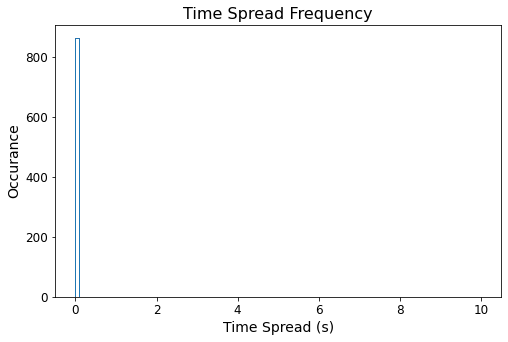

In [17]:
plt.figure(figsize=(8,5))
array = plt.hist(messydata.get_clusterdf()["TimeSpread"],np.linspace(0,10,100), histtype='step', color='r')
array = plt.hist(data.get_clusterdf()["TimeSpread"],np.linspace(0,10,100), histtype='step')
plt.title("Time Spread Frequency", fontsize=16)
plt.xlabel("Time Spread (s)", fontsize=14)
plt.ylabel("Occurance", fontsize=14)
plt.tick_params(labelsize=12) #adjust fontsize of axis ticks

#plt.ylim(0,50)

#plt.savefig('plots/pdf/Pre_TimeSpread.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Pre_TimeSpread.png',dpi=300,bbox_inches = "tight")


#plt.figure()
#plt.title("Time Spread Frequency (filtered)", fontsize=16)
#plt.xlabel("Time Spread (s)", fontsize=14)
#plt.ylabel("Occurance", fontsize=14)

#plt.ylim(0,50)

plt.savefig('plots/pdf/TimeSpread.pdf',bbox_inches = "tight")
plt.savefig('plots/png/TimeSpread.png',dpi=300,bbox_inches = "tight")

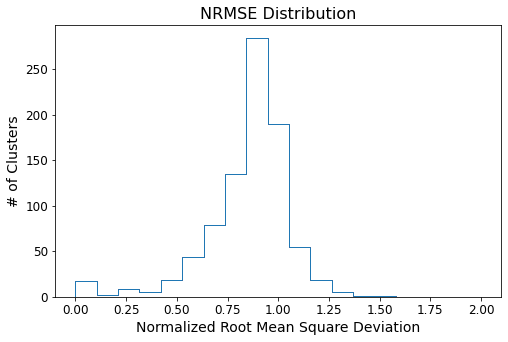

In [18]:
plt.figure(figsize=(8,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=12) #adjust fontsize of axis ticks
plt.title("NRMSE Distribution", fontsize=16)
plt.ylabel('# of Clusters',fontsize=14)
plt.xlabel('Normalized Root Mean Square Deviation',fontsize=14)

array=plt.hist(messydata.get_clusterdf()['NRMSE'], np.linspace(0,2,20), histtype='step', color='r')
array=plt.hist(data.get_clusterdf()['NRMSE'], np.linspace(0,2,20), histtype='step')

#line = plt.axvline(1)

#plt.savefig('plots/pdf/NRMSE.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/NRMSE.png',dpi=300,bbox_inches = "tight")


#############################################################################################################
#
#plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
#plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
#plt.title("Filtered NRMSE Distribution", fontsize=18)
#plt.ylabel('# of Clusters',fontsize=16)
#plt.xlabel('Normalized Root Mean Square Deviation',fontsize=16)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,180,181), histtype='step')


#line=plt.axvline(1)
#plt.gca().set_yscale("log")

#plt.savefig('plots/pdf/NRMSE.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/NRMSE.png',dpi=300,bbox_inches = "tight")

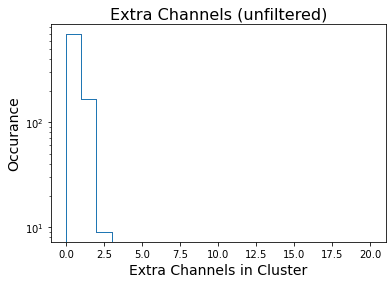

In [19]:
plt.figure()
plt.title("Extra Channels (unfiltered)", fontsize=16)
plt.xlabel("Extra Channels in Cluster", fontsize=14)
plt.ylabel("Occurance", fontsize=14)

array = plt.hist(messydata.get_clusterdf()['ExtraCh'], np.linspace(0,20,21), color='r', histtype='step')
plt.gca().set_yscale("log")

#plt.savefig('plots/pdf/Pre_ExtraChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Pre_ExtraChannels.png',dpi=300,bbox_inches = "tight")


#plt.figure()
#plt.title("Extra Channels (filtered)", fontsize=16)
#plt.xlabel("Extra Channels in Cluster", fontsize=14)
#plt.ylabel("Occurance", fontsize=14)

array = plt.hist(data.get_clusterdf()['ExtraCh'], np.linspace(0,20,21), histtype='step')
#plt.gca().set_yscale("log")

#plt.savefig('plots/pdf/ExtraChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/ExtraChannels.png',dpi=300,bbox_inches = "tight")

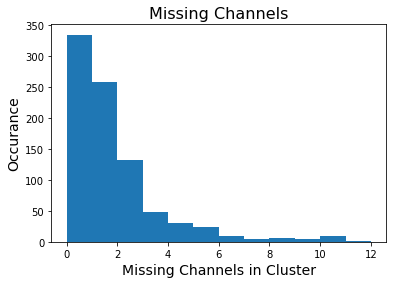

In [20]:
plt.figure()
plt.title("Missing Channels", fontsize=16)
plt.xlabel("Missing Channels in Cluster", fontsize=14)
plt.ylabel("Occurance", fontsize=14)
array = plt.hist(messydata.get_clusterdf()['MissingCh'], np.linspace(0,12,13), color='r')

#plt.savefig('plots/pdf/Pre_MissingChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Pre_MissingChannels.png',dpi=300,bbox_inches = "tight")


#plt.figure()
#plt.title("Missing Channels (filtered)", fontsize=16)
#plt.xlabel("Missing Channels in Cluster", fontsize=14)
#plt.ylabel("Occurance", fontsize=14)
array = plt.hist(data.get_clusterdf()['MissingCh'], np.linspace(0,12,13))

#plt.savefig('plots/pdf/MissingChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/MissingChannels.png',dpi=300,bbox_inches = "tight")


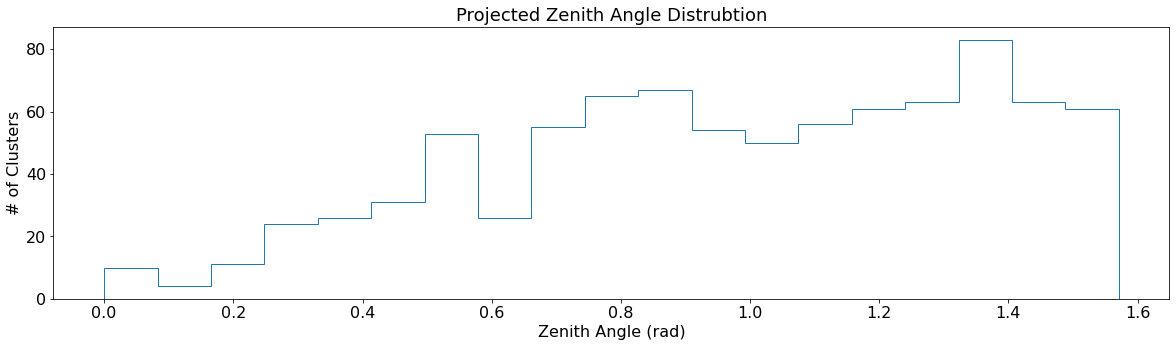

In [35]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Projected Zenith Angle Distrubtion", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Zenith Angle (rad)',fontsize=16)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,100,40), histtype='step')
array=plt.hist(data.get_clusterdf()['Zenith'], np.linspace(0,math.pi/2,20), histtype='step')

#plt.savefig('plots/pdf/Zenith.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Zenith.png',dpi=300,bbox_inches = "tight")

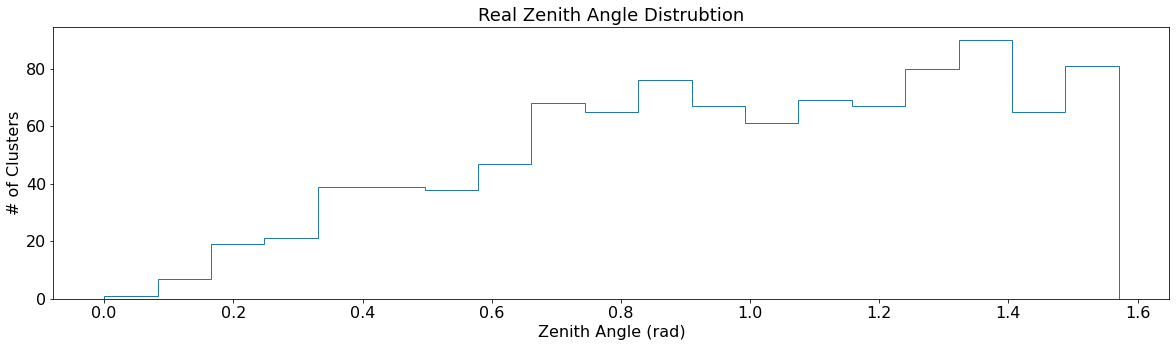

In [34]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Real Zenith Angle Distrubtion", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Zenith Angle (rad)',fontsize=16)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,100,40), histtype='step')
array=plt.hist([data.zenith(mc.get_tracks()[i]) for i in range(len(mc.get_tracks()))], np.linspace(0,math.pi/2,20), histtype='step')

#plt.savefig('plots/pdf/Zenith.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Zenith.png',dpi=300,bbox_inches = "tight")

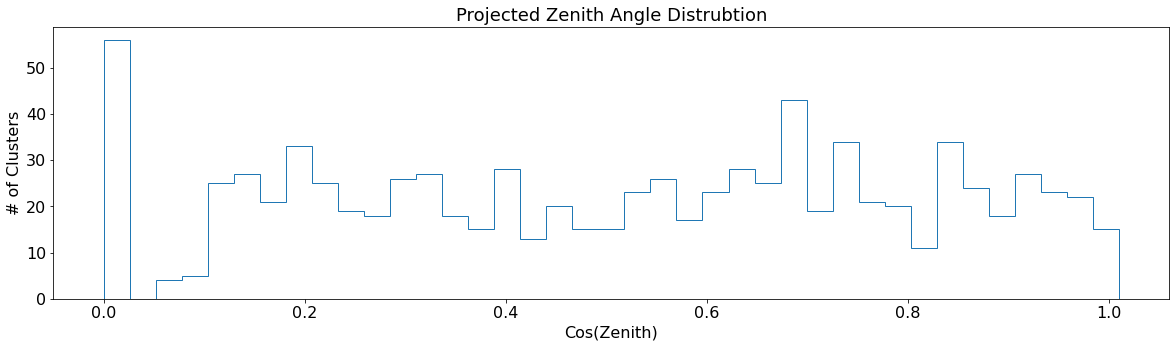

In [38]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Projected Zenith Angle Distrubtion", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Cos(Zenith)',fontsize=16)
array = plt.hist([math.cos(x) for x in data.get_clusterdf()['Zenith']], np.linspace(0,1.01,40), histtype='step')

#plt.savefig('plots/pdf/CosZenith.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/CosZenith.png',dpi=300,bbox_inches = "tight")

(0.0, 55.0)

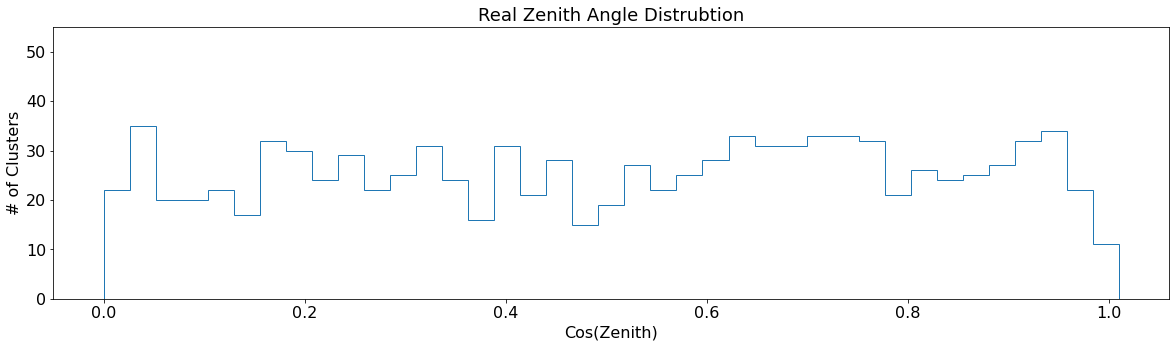

In [39]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Real Zenith Angle Distrubtion", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Cos(Zenith)',fontsize=16)
array = plt.hist([math.cos(data.zenith(mc.get_tracks()[i])) for i in range(len(mc.get_tracks()))], np.linspace(0,1.01,40), histtype='step')

plt.ylim(0,55)
#plt.savefig('plots/pdf/CosZenith.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/CosZenith.png',dpi=300,bbox_inches = "tight")

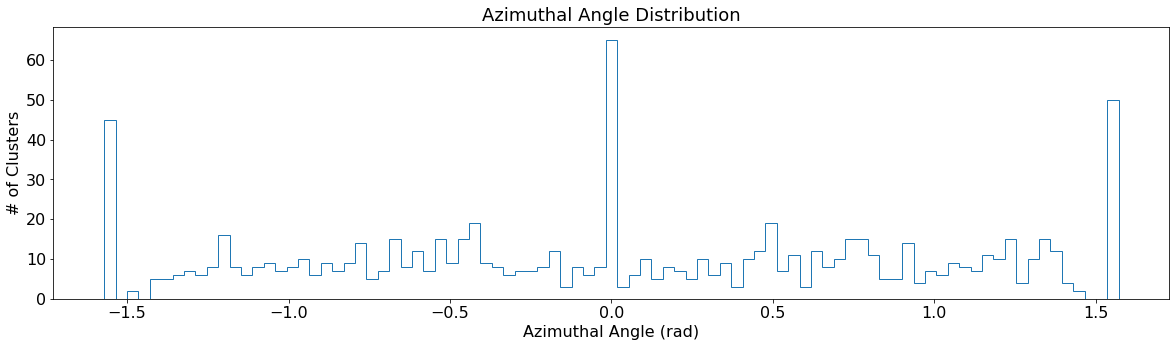

In [24]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Azimuthal Angle Distribution", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Azimuthal Angle (rad)',fontsize=16)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,100,40), histtype='step')
array=plt.hist(data.get_clusterdf()['Azimuth'], np.linspace(-math.pi/2,math.pi/2,90), histtype='step')

#plt.savefig('plots/pdf/Azimuth.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Azimuth.png',dpi=300,bbox_inches = "tight")

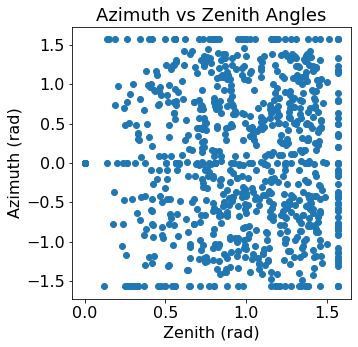

In [25]:
plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Azimuth vs Zenith Angles", fontsize=18)
plt.ylabel('Azimuth (rad)',fontsize=16)
plt.xlabel('Zenith (rad)',fontsize=16)

array = plt.scatter(data.get_clusterdf()['Zenith'], data.get_clusterdf()['Azimuth'])

#plt.savefig('plots/pdf/Azimuth_vs_Zenith.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Azimuth_vs_Zenith.png',dpi=300,bbox_inches = "tight")

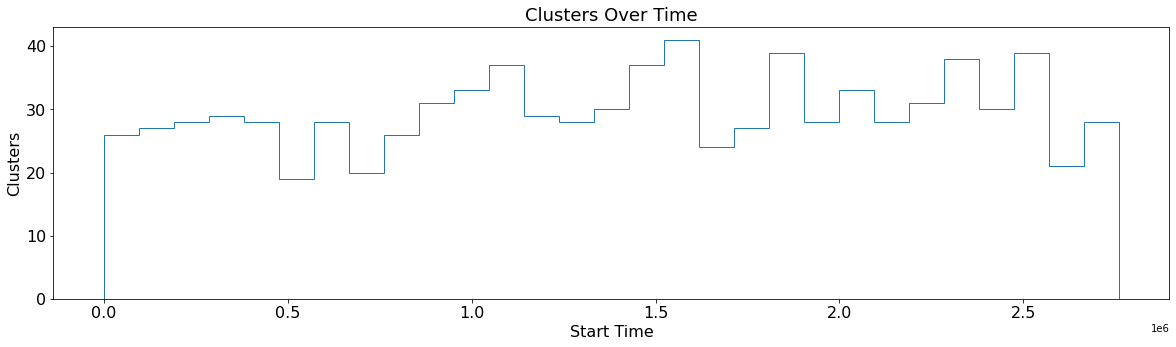

In [26]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Clusters Over Time", fontsize=18)
plt.ylabel('Clusters',fontsize=16)
plt.xlabel('Start Time',fontsize=16)
array=plt.hist(data.get_clusterdf()['StartTime'], np.linspace(0,2760000,30), histtype='step')
#plt.gca().set_yscale("log")

plt.savefig('plots/pdf/ClusterTimes.pdf',bbox_inches = "tight")
plt.savefig('plots/png/ClusterTimes.png',dpi=300,bbox_inches = "tight")

In [27]:
data.get_clusterdf().loc[(data.get_clusterdf()['Channels'] >= 10) & (data.get_clusterdf()['MissingCh'] <= 3)]

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh
1,1,11,11,6.981165e+03,0.0,0.957807,1.024396,0.602582,0,3
8,8,13,13,1.834432e+04,0.0,0.756198,0.298336,-1.570796,0,0
14,14,10,10,4.123274e+04,0.0,1.029023,0.726537,0.729450,0,1
18,18,11,11,6.117063e+04,0.0,0.949087,0.931244,-0.957485,0,0
20,20,11,11,7.358004e+04,0.0,0.708644,0.641140,-0.171942,0,0
...,...,...,...,...,...,...,...,...,...,...
852,852,12,12,2.736312e+06,0.0,0.985503,1.014369,1.055765,0,0
853,853,14,14,2.737253e+06,0.0,0.990420,0.987073,-0.979550,0,0
854,854,10,10,2.740395e+06,0.0,0.736740,0.340284,-0.729419,0,1
856,856,10,10,2.747660e+06,0.0,0.606931,0.495065,-1.570796,0,1


In [28]:
data.get_clusterdf().loc[(data.get_clusterdf()['MissingCh'] >= 10)]

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh
50,50,3,3,1.765247e+05,0.0,0.000000e+00,0.000000,0.000000,0,10
54,54,3,3,2.042980e+05,0.0,0.000000e+00,0.000000,0.000000,0,10
151,151,3,3,5.455249e+05,0.0,0.000000e+00,0.000000,0.000000,0,10
271,271,3,3,9.782431e+05,0.0,5.949544e-01,1.167186,1.570796,0,10
289,289,3,3,1.039645e+06,0.0,7.291971e-01,0.497751,-1.570796,0,10
460,460,3,3,1.529298e+06,0.0,0.000000e+00,0.000000,0.000000,0,10
470,470,3,3,1.553962e+06,0.0,1.688823e-15,0.000000,0.000000,0,10
576,576,3,3,1.875415e+06,0.0,0.000000e+00,0.000000,0.000000,0,10
711,711,3,3,2.292265e+06,0.0,1.162242e+00,0.809234,-0.000000,0,12
744,744,3,3,2.377835e+06,0.0,0.000000e+00,0.000000,0.000000,0,10


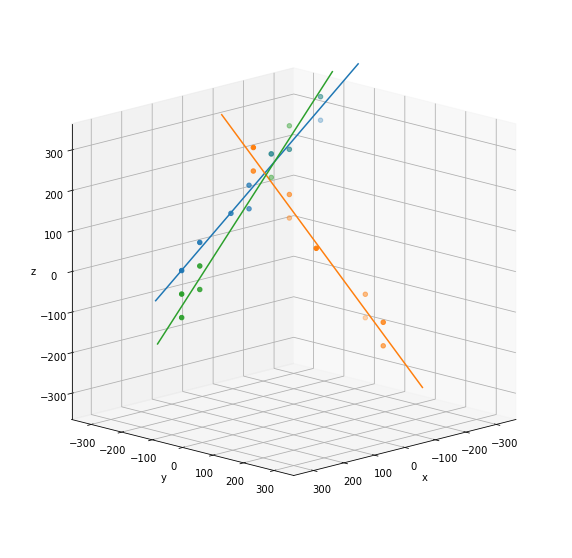

In [29]:
data.show_cluster([6,69, 106])

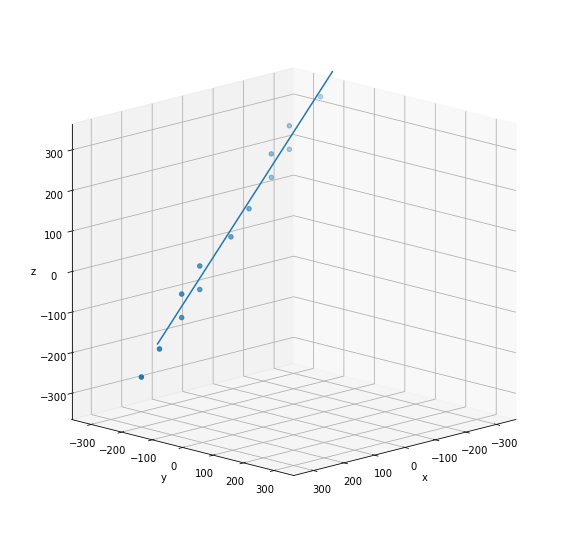

In [30]:
data.show_simulation(106)

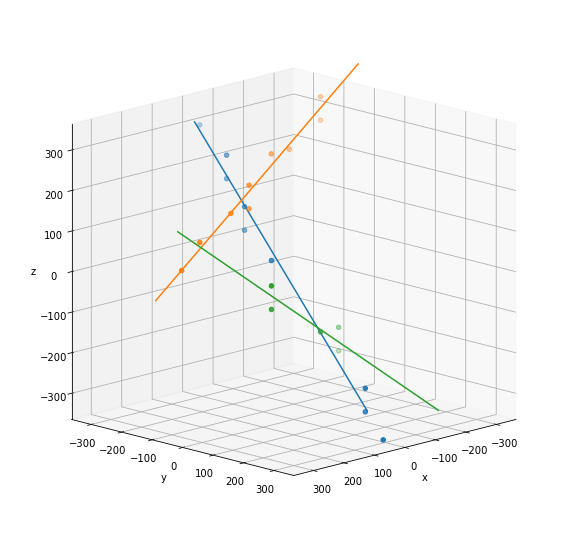

In [31]:
data.show_cluster([2,6,9])

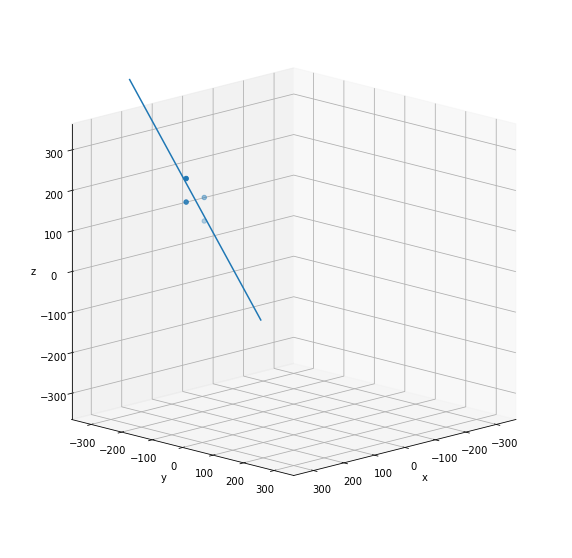

In [32]:
data.show_cluster(0)